# 1. Perkenalan

Nama    : Hafidz Abdillah Masruri<br>
Batch   : HCK-18<br>
Colab   : [Dataset](https://colab.research.google.com/drive/11cyfH3M87kNKlHBxiGSlJWI4BeH3HL5D?usp=sharing)<br>

Notebook ini bertujuan untuk memubat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank, data informasi penggunaan kartu kredit selama 6 bulan terakhir.<br>

=====================================================================================<br>


# 2. Query SQL

In [1]:
# # Working area
# from google.colab import auth
# from google.cloud import bigquery
# auth.authenticate_user()
# print('Authenticated')

# project_id = "digital-arcade-427010-t9" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
# client = bigquery.Client(project=project_id)

# df = client.query('''

# SELECT *
# FROM `ftds-hacktiv8-project.phase1_ftds_018_hck.credit-card-information`
# where MOD(cust_id,2) = 0;

# ''').to_dataframe()
# df

# df.to_csv('P1G6_Set_1_Hafidsz_Masruri.csv', index=False)

Query SQL untuk melakukan pemanggilan dengan cust_id berbentuk genap menggunakan MOD

# 3. Import Library

In [2]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Statistical analysis
# import statsmodels.api as sm
# from scipy import stats
# from scipy.stats import kendalltau, spearmanr, chi2_contingency
# from statsmodels.stats.stattools import durbin_watson

# Feature engineering
from sklearn.preprocessing import  MinMaxScaler
from feature_engine.outliers import Winsorizer

# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

# Machine learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Model Saving
import pickle

# Warning management
import warnings
warnings.filterwarnings('ignore')

Import Library yang digunakan untuk pengerjaan

# 4. Data Loading

In [3]:
# loading csv file
df = pd.read_csv("P1G6_Set_1_Hafidsz_Masruri.csv")
df1 = df.copy()
display(df1.head(10))
display(df1.tail(10))

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

Melakukan data loading dengan df sebagai variabel, lalu melakukan duplikat df untuk df2, serta menampilkan 10 teratas dan 10 terebawah pada data

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Info yang didapat dalam dataframe terdapat 18 kolom dengan total 4475 baris, terdapat missing value, serta mendapatkan type data tiap kolom

# 5.Exploratory Data Analysis (EDA)

## 5.1 Cek Missing Value

In [5]:
df1.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Missing value didapat 158 pada kolom 'MINIMUM_PAYMENT' serta 1 pada kolom 'CREDIT_LIMIT'

In [6]:
df1.duplicated().sum()

0

Tidak ditemukan duplikat data

## 5.2 Frequensi Tenure

freq  total
0    12   3807
1    11    166
2    10    114
3     6    103
4     7    100
5     8     97
6     9     88

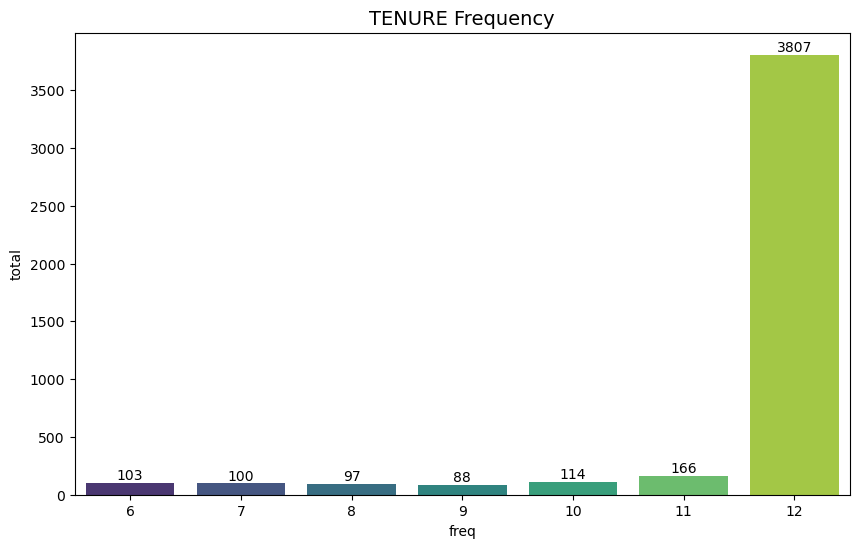

In [7]:
tenure = df1['TENURE'].value_counts().reset_index()
tenure.columns =  ['freq', 'total']
display(tenure)
# Urutkan DataFrame berdasarkan kolom 'freq' secara ascending
tenure = tenure.sort_values(by='freq', ascending=True)

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='freq', y='total', data=tenure, palette='viridis')

# Menambahkan nilai di atas setiap bar
for index, value in enumerate(tenure['total']):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

# Menambahkan judul pada plot
plt.title('TENURE Frequency', fontsize=14)

# Menampilkan plot
plt.show()

Pada distribusi Tenure terlihat bahwa banyak pengguna memilih 12 bulan sebagai berapa lama mereka harus mengembalikan uang

## 5.3 Distribusi Feature

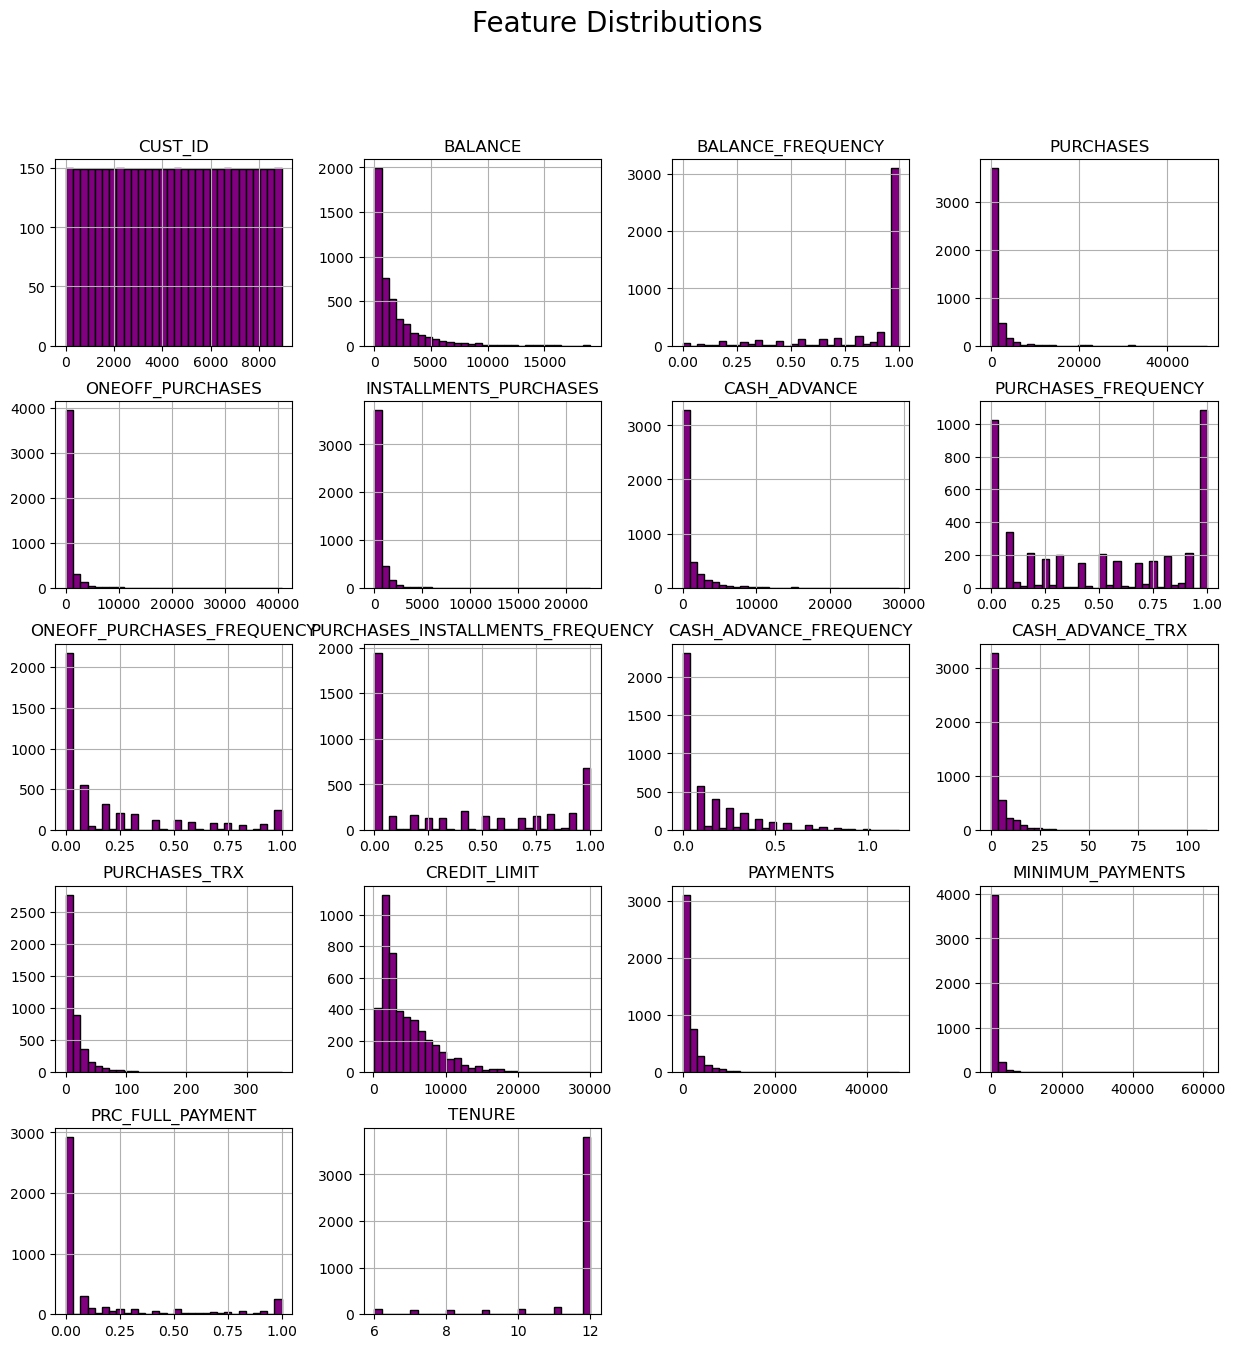

In [8]:
# Histograms for each feature
df1.hist(bins=30, figsize=(15, 15), color='purple', edgecolor='black')
plt.suptitle('Feature Distributions', size=20)
plt.show()

Distribusi data menunjukkan bahwa ada variasi besar di antara pelanggan dalam hal penggunaan saldo, frekuensi pembelian, dan penggunaan advance tunai. Data ini menunjukkan bahwa pelanggan dapat dikelompokkan menjadi beberapa segmen yang berbeda berdasarkan kebiasaan penggunaan mereka.

# 6. Feature Engineering

In [9]:
df2 = df1.copy()

Melakukan duplikasi df1 dan disave pada df2, agar saat kita lakukan handling maupun drop kita masih memiliki backup data

In [10]:
df2[df2.isnull().any(axis=1)]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
2        2322     1.979916           0.125000      80.00             80.00   
6        4360  2730.843802           1.000000    2900.00           2900.00   
8        5884    18.885677           0.375000      57.00             57.00   
27       1830     0.000000           0.000000      66.75              0.00   
...       ...          ...                ...        ...               ...   
4049     7492  2242.311686           1.000000     437.00             97.00   
4087     4290  1948.434315           1.000000     324.30            324.30   
4091     5468  4618.091584           1.000000     541.68            541.68   
4144     4234    27.716642           0.100000       0.00              0.00   
4293     8058   116.172752           0.111111       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
6                       0.00      0.000000             0.125000   
8                       0.00      0.000000             0.125000   
27                     66.75      0.000000             0.250000   
...                      ...           ...                  ...   
4049                  340.00    184.648692             0.333333   
4087                    0.00   1468.083560             0.166667   
4091                    0.00   3580.753362             0.166667   
4144                    0.00    480.104401             0.000000   
4293                    0.00   1867.994674             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
2                       0.125000                          0.000000   
6                       0.125000                          0.000000   
8                       0.125000                          0.000000   
27                      0.000000                          0.250000   
...                          ...                               ...   
4049                    0.083333                          0.333333   
4087                    0.166667                          0.000000   
4091                    0.166667                          0.000000   
4144                    0.000000                          0.000000   
4293                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
2                   0.000000                 0              1        1500.0   
6                   0.000000                 0              1        2900.0   
8                   0.000000                 0              1        1500.0   
27                  0.000000                 0              3        4000.0   
...                      ...               ...            ...           ...   
4049                0.166667                 2              5        2400.0   
4087                0.166667                 4              4        5000.0   
4091                0.166667                 2              2        8500.0   
4144                0.100000                 1              0        5000.0   
4293                0.111111                 6              0        3000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0          0.0               NaN               0.0       8  
2          0.0               NaN               0.0       8  
6          0.0               NaN               0.0       8  
8          0.0               NaN               0.0       8  
27         0.0               NaN               0.0      12  
...        ...               ...               ...     ...  
4049       0.0               NaN               

Menampilkan beberapa contoh missing value pada data, terlihat pada kolom 'MINIMUM_PAYMENT' cukup banyak, selanjutnya kita akan cari skew lalu melakukan imputasi pada data missing value

In [11]:
print('CREDIT_LIMIT     : ',df2['CREDIT_LIMIT'].skew())
print('MINIMUM_PAYMENT  : ',df2['MINIMUM_PAYMENTS'].skew())

CREDIT_LIMIT     :  1.5450779677462632
MINIMUM_PAYMENT  :  12.357860274482807


didapat nilai skew pada CREDIT_LIMIT sebesar 1,545 (skew), lalu pada kolom MINIMUM_PAYMENT sebesar 12,3578 (skew) maka kita akan melakukan imputasi dengan cara mencari nilai median

In [12]:
print('CREDIT_LIMIT     : ',df2['CREDIT_LIMIT'].median())
print('MINIMUM_PAYMENT  : ',df2['MINIMUM_PAYMENTS'].median())

CREDIT_LIMIT     :  3000.0
MINIMUM_PAYMENT  :  309.854995


Didapat nilai median pada kolom CREDIT_LIMIT adalah 3000 dan pada kolom MINIMUM_PAYMENT adalah 309,854995

In [13]:
df2['MINIMUM_PAYMENTS'] = df2['MINIMUM_PAYMENTS'].fillna(309.854995)
df2['CREDIT_LIMIT'] = df2['CREDIT_LIMIT'].fillna(3000)

Melakukan replace dengan cara fillna data dengan nilai NaN kita ubah menjadi median dari tiap kolom

## 6.1 Cek Cardinality

In [14]:
# Set the maximum column width to None to display the entire content of each column
# pd.set_option('display.max_colwidth', None)

# # Set the maximum number of rows to None to display all rows
# pd.set_option('display.max_rows', None)

# Create a looping for unique values details
listItem = []
for col in df2.columns :
    listItem.append( [col,df2[col].nunique(),df2[col].unique()])

# Create into a dataframe
unique_val_df_train = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

# Show the dataframe
unique_val_df_train

Column Name  Number of Unique  \
0                            CUST_ID              4475   
1                            BALANCE              4439   
2                  BALANCE_FREQUENCY                42   
3                          PURCHASES              3218   
4                   ONEOFF_PURCHASES              2073   
5             INSTALLMENTS_PURCHASES              2357   
6                       CASH_ADVANCE              2155   
7                PURCHASES_FREQUENCY                47   
8         ONEOFF_PURCHASES_FREQUENCY                44   
9   PURCHASES_INSTALLMENTS_FREQUENCY                47   
10            CASH_ADVANCE_FREQUENCY                46   
11                  CASH_ADVANCE_TRX                55   
12                     PURCHASES_TRX               147   
13                      CREDIT_LIMIT               153   
14                          PAYMENTS              4350   
15                  MINIMUM_PAYMENTS              4317   
16                  PRC_FULL_PAYMENT                47   
17                            TENURE                 7   

                                        Unique Sample  
0   [788, 1902, 2322, 3426, 3976, 4266, 4360, 4680...  
1   [16.581535, 943.584041, 1.979916, 461.45572, 1...  
2   [0.125, 0.875, 1.0, 0.375, 0.545455, 0.454545,...  
3   [200.0, 103.0, 80.0, 585.0, 1450.0, 120.0, 290...  
4   [0.0, 103.0, 80.0, 585.0, 1450.0, 120.0, 2900....  
5   [200.0, 0.0, 51.7, 41.07, 639.56, 393.87, 49.5...  
6   [0.0, 1103.30382, 455.227731, 1977.834772, 138...  
7   [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, ...  
8   [0.0, 0.125, 0.25, 0.083333, 0.166667, 0.375, ...  
9   [0.125, 0.0, 0.25, 0.166667, 0.083333, 0.33333...  
10  [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....  
11  [0, 1, 2, 4, 9, 3, 10, 5, 12, 7, 11, 15, 6, 14...  
12  [2, 1, 3, 5, 4, 8, 6, 12, 17, 7, 10, 9, 14, 11...  
13  [1200.0, 1000.0, 1500.0, 2500.0, 2900.0, 3000....  
14  [0.0, 215.325023, 258.03263, 397.090516, 343.1...  
15  [309.854995, 410.484825, 151.696433, 227.14318...  
16  [0.0, 0.333333, 0.222222, 0.25, 0.75, 1.0, 0.5...  
17                           [8, 12, 10, 6, 7, 11, 9]

Disini drop kolom 'CUST_ID' karena besar unique sama dengan besar baris, serta hapus 'TENURE' dikarenakan kedua kolom adalah kategorikal dan tidak dapat dilakukan KMeans

In [15]:
df2 = df2.drop('CUST_ID', axis=1)
df2 = df2.drop('TENURE', axis=1)

Drop kolom yang termasuk kategorikal

## 6.2 Handling outlier

In [16]:
def outlier_analysis(data):
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []
    outlier_types = []
    outlier_handling = []

    for column in data.columns:
        col_name.append(column)
        # Calculate skewness
        skewval = data[column].skew()
        skew.append(skewval)

        # Determine outlier type based on skewness
        if skewval > 1 or skewval < -1:
            outlier_types.append('Extreme')
            outlier_handling.append('Interquartile Range (IQR)')
            IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
            lower_boundary = data[column].quantile(0.25) - (IQR * 3)
            upper_boundary = data[column].quantile(0.75) + (IQR * 3)
        elif -0.5 <= skewval <= 0.5:
            outlier_types.append('No skew')
            outlier_handling.append('Gaussian')
            std = data[column].std()
            lower_boundary = data[column].mean() - (std * 3)
            upper_boundary = data[column].mean() + (std * 3)
        elif 0.5 < skewval < 1 or -1 <= skewval < -0.5:
            outlier_types.append('Moderate')
            outlier_handling.append('Interquartile Range (IQR)')
            IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
            lower_boundary = data[column].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[column].quantile(0.75) + (IQR * 1.5)

        # Check for outliers
        outliers = (data[column] < lower_boundary) | (data[column] > upper_boundary)
        has_outliers.append(any(outliers))

        # Store upper and lower boundaries
        upper.append(upper_boundary)
        lower.append(lower_boundary)

    # Populate the result DataFrame
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has outliers'] = has_outliers
    result['outlier types'] = outlier_types
    result['handling'] = outlier_handling

    return result

Fungsi untuk melakukan handling outlier dengan menghitung nilai skew dari data, untuk nilai extreme(IQR), skew >= 1 dan kurang dari <= -1. untuk nilai Medium(IQR), skew >= 0,5 dan skew <= -0,5.
lalu sisanya normal(Gaussian)

Fungsi untuk filter outliers 

In [17]:
dfb = outlier_analysis(df2)
dfb

columns   skewness  upper boundary  \
0                            BALANCE   2.456621     7836.467593   
1                  BALANCE_FREQUENCY  -2.020309        1.333333   
2                          PURCHASES   8.987052     4370.365000   
3                   ONEOFF_PURCHASES  10.140059     2321.280000   
4             INSTALLMENTS_PURCHASES   8.116887     1937.020000   
5                       CASH_ADVANCE   4.739678     4394.279848   
6                PURCHASES_FREQUENCY   0.061598        1.689743   
7         ONEOFF_PURCHASES_FREQUENCY   1.523455        1.333332   
8   PURCHASES_INSTALLMENTS_FREQUENCY   0.510288        1.875000   
9             CASH_ADVANCE_FREQUENCY   1.823380        0.727272   
10                  CASH_ADVANCE_TRX   4.752780       16.000000   
11                     PURCHASES_TRX   4.480452       65.000000   
12                      CREDIT_LIMIT   1.545423    19500.000000   
13                          PAYMENTS   6.040773     6413.216899   
14                  MINIMUM_PAYMENTS  12.569714     2652.464173   
15                  PRC_FULL_PAYMENT   1.911650        0.666668   

    lower boundary  has outliers outlier types                   handling  
0     -5645.412077          True       Extreme  Interquartile Range (IQR)  
1         0.555556          True       Extreme  Interquartile Range (IQR)  
2     -3207.660000          True       Extreme  Interquartile Range (IQR)  
3     -1740.960000          True       Extreme  Interquartile Range (IQR)  
4     -1452.765000          True       Extreme  Interquartile Range (IQR)  
5     -3295.709886          True       Extreme  Interquartile Range (IQR)  
6        -0.709499         False       No skew                   Gaussian  
7        -0.999999         False       Extreme  Interquartile Range (IQR)  
8        -1.125000         False      Moderate  Interquartile Range (IQR)  
9        -0.545454          True       Extreme  Interquartile Range (IQR)  
10      -12.000000          True       Extreme  Interquartile Range (IQR)  
11      -47.000000          True       Extreme  Interquartile Range (IQR)  
12   -12000.000000          True       Extreme  Interquartile Range (IQR)  
13    -4127.051525          True       Extreme  Interquartile Range (IQR)  
14    -1689.948686          True       Extreme  Interquartile Range (IQR)  
15       -0.500001          True       Extreme  Interquartile Range (IQR)

Didapat sejumlah 16 kolom, 13 kolom memiliki outliers dan semua bersifat extreme

In [18]:
skew_normal = dfb[(dfb['has outliers'] == True) & (dfb['outlier types'] == 'Normal')]['columns'].tolist()
skew_normal

[]

skew normal tidak ada

In [19]:
skew_moderete = dfb[(dfb['has outliers'] == True) & (dfb['outlier types'] == 'Moderete')]['columns'].tolist()
skew_moderete

[]

skew moderete tidak ada

In [20]:
skew_extreme = dfb[(dfb['has outliers'] == True) & (dfb['outlier types'] == 'Extreme')]['columns'].tolist()
skew_extreme

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

skew extreme memiliki 13 kolom

In [21]:
no_skew = dfb[(dfb['has outliers'] == False)]['columns'].tolist()
no_skew

['PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY']

tidak memiliki outliers ada 3 kolom

## 6.3 Capping

In [22]:
#capping skewed data
winsoriser_skew = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=skew_extreme)

df_capped_extreme = winsoriser_skew.fit_transform(df2[skew_extreme])

Digunakan extreme pada outliers extreme, menggunakan method iqr dan fold 3 karena extreme

In [23]:
df_capped_extreme.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    16.581535           0.555556      200.0               0.0   
1   943.584041           0.875000      103.0             103.0   
2     1.979916           0.555556       80.0              80.0   
3   461.455720           1.000000      585.0             585.0   
4  1053.594730           1.000000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0                   200.0           0.0                     0.0   
1                     0.0           0.0                     0.0   
2                     0.0           0.0                     0.0   
3                     0.0           0.0                     0.0   
4                     0.0           0.0                     0.0   

   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS  \
0                 0              2        1200.0    0.000000   
1                 0              1        1000.0  215.325023   
2                 0              1        1500.0    0.000000   
3                 0              1        1000.0  258.032630   
4                 0              1        1500.0  397.090516   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0        309.854995               0.0  
1        410.484825               0.0  
2        309.854995               0.0  
3        151.696433               0.0  
4        227.143184               0.0

Hasil dari capping

In [24]:
df_capped = pd.concat([df2[no_skew],df_capped_extreme], axis=1)
df_capped

PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0                0.125000                    0.000000   
1                0.125000                    0.125000   
2                0.125000                    0.125000   
3                0.125000                    0.125000   
4                0.125000                    0.125000   
...                   ...                         ...   
4470             0.000000                    0.000000   
4471             0.000000                    0.000000   
4472             1.000000                    0.727273   
4473             0.454545                    0.454545   
4474             0.909091                    0.090909   

      PURCHASES_INSTALLMENTS_FREQUENCY      BALANCE  BALANCE_FREQUENCY  \
0                             0.125000    16.581535           0.555556   
1                             0.000000   943.584041           0.875000   
2                             0.000000     1.979916           0.555556   
3                             0.000000   461.455720           1.000000   
4                             0.000000  1053.594730           1.000000   
...                                ...          ...                ...   
4470                          0.000000  1079.008102           1.000000   
4471                          0.000000   809.582978           0.909091   
4472                          0.363636  3386.490883           1.000000   
4473                          0.000000  4840.545574           1.000000   
4474                          0.818182  1977.007090           1.000000   

      PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0        200.00              0.00                  200.00      0.000000   
1        103.00            103.00                    0.00      0.000000   
2         80.00             80.00                    0.00      0.000000   
3        585.00            585.00                    0.00      0.000000   
4       1450.00           1450.00                    0.00      0.000000   
...         ...               ...                     ...           ...   
4470       0.00              0.00                    0.00   1259.571764   
4471       0.00              0.00                    0.00   3819.672466   
4472     560.98            427.22                  133.76   2008.153534   
4473    1595.93           1595.93                    0.00   4359.325750   
4474    1032.04            226.90                  805.14   4335.919227   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                16             25        6000.0   
4474                0.545455                16             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0        0.000000        309.854995          0.000000  
1      215.325023        410.484825          0.000000  
2        0.000000        309.854995          0.000000  
3      258.032630        151.696433          0.000000  
4      397.090516        227.143184          0.000000  
...           ...               ...               ...  
4470  1379.635287        271.364415          0.090909  
4471  4372.148648        241.645387          0.090909  
4472  1039.000037        886.050237          0.000000  
4473   905.844846     

Concat pada data 'after capping' dan yang tidak memiliki outlier

## 6.4 Scalling

In [25]:
# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(df_capped)

# Transform the train and test set
df2_scaled = scaler.transform(df_capped)

Melakukan Scalling pada hasil capping

In [26]:
df2_scaled

array([[0.125     , 0.        , 0.125     , ..., 0.        , 0.11680522,
        0.        ],
       [0.125     , 0.125     , 0.        , ..., 0.0335752 , 0.154744  ,
        0.        ],
       [0.125     , 0.125     , 0.        , ..., 0.        , 0.11680522,
        0.        ],
       ...,
       [1.        , 0.727273  , 0.363636  , ..., 0.16200918, 0.33403848,
        0.        ],
       [0.454545  , 0.454545  , 0.        , ..., 0.14124656, 0.89611602,
        0.13636323],
       [0.909091  , 0.090909  , 0.818182  , ..., 0.47658219, 0.34333461,
        0.13636323]])

Hasil dari setelah dilakukan scaling

In [27]:
df_final = pd.DataFrame(df2_scaled)
df_final.columns = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'BALANCE', 'BALANCE_FREQUENCY',
       'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
       'PRC_FULL_PAYMENT']
df_final

PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0                0.125000                    0.000000   
1                0.125000                    0.125000   
2                0.125000                    0.125000   
3                0.125000                    0.125000   
4                0.125000                    0.125000   
...                   ...                         ...   
4470             0.000000                    0.000000   
4471             0.000000                    0.000000   
4472             1.000000                    0.727273   
4473             0.454545                    0.454545   
4474             0.909091                    0.090909   

      PURCHASES_INSTALLMENTS_FREQUENCY   BALANCE  BALANCE_FREQUENCY  \
0                             0.125000  0.002116           0.000000   
1                             0.000000  0.120409           0.718750   
2                             0.000000  0.000253           0.000000   
3                             0.000000  0.058886           1.000000   
4                             0.000000  0.134448           1.000000   
...                                ...       ...                ...   
4470                          0.000000  0.137691           1.000000   
4471                          0.000000  0.103310           0.795455   
4472                          0.363636  0.432145           1.000000   
4473                          0.000000  0.617695           1.000000   
4474                          0.818182  0.252283           1.000000   

      PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0      0.045763          0.000000                0.103251      0.000000   
1      0.023568          0.044372                0.000000      0.000000   
2      0.018305          0.034464                0.000000      0.000000   
3      0.133856          0.252016                0.000000      0.000000   
4      0.331780          0.624655                0.000000      0.000000   
...         ...               ...                     ...           ...   
4470   0.000000          0.000000                0.000000      0.286639   
4471   0.000000          0.000000                0.000000      0.869237   
4472   0.128360          0.184045                0.069055      0.456993   
4473   0.365171          0.687522                0.000000      0.992046   
4474   0.236145          0.097748                0.415659      0.986719   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000            0.0000       0.030769      0.054264   
1                   0.000000            0.0000       0.015385      0.043928   
2                   0.000000            0.0000       0.015385      0.069767   
3                   0.000000            0.0000       0.015385      0.043928   
4                   0.000000            0.0000       0.015385      0.069767   
...                      ...               ...            ...           ...   
4470                0.750001            0.5625       0.000000      0.054264   
4471                0.750001            0.4375       0.000000      0.206718   
4472                0.750001            0.5625       0.307692      0.514212   
4473                0.750001            1.0000       0.384615      0.302326   
4474                0.750001            1.0000       0.261538      0.198966   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0     0.000000          0.116805          0.000000  
1     0.033575          0.154744          0.000000  
2     0.000000          0.116805          0.000000  
3     0.040235          0.057177          0.000000  
4     0.061918          0.085622          0.000000  
...        ...               ...               ...  
4470  0.215124          0.102294          0.136363  
4471  0.681740          0.091089          0.136363  
4472  0.162009          0.334038          0.000000  
4473  0.141247          0.896116          0.136363  
4474  0.476582          0.343335   

Membuat hasil scaling menjadi dataframe

## 6.5 Dimensional Reduction

### 6.5.1 PCA

In [28]:
pca = PCA()
pca.fit(df_final)

PCA()

Fitur-fitur dari pca.fit(dff) adalah untuk mempersiapkan PCA untuk mentransformasi data ke ruang dimensi yang lebih rendah

Text(0, 0.5, 'Eigenvalues')

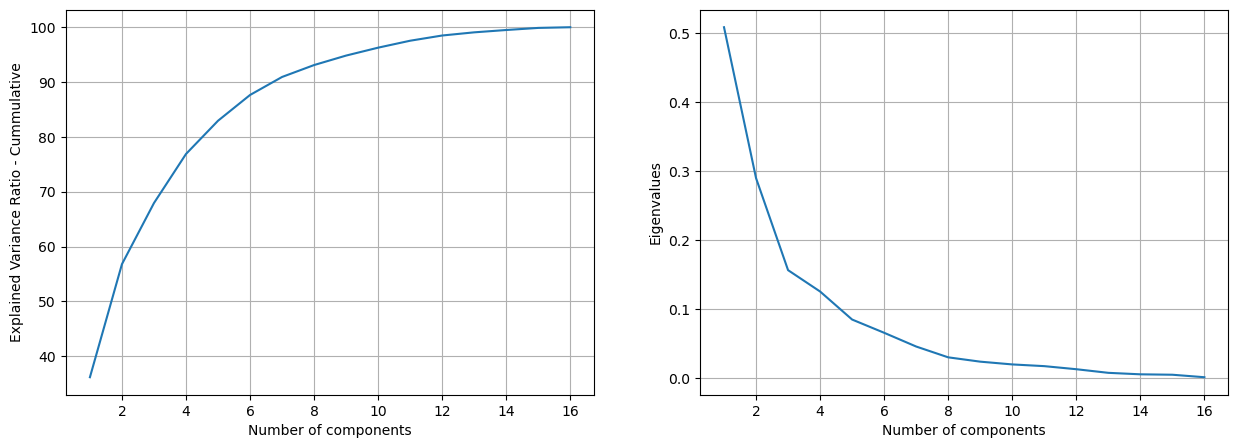

In [29]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 17), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 17), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Bentuk Kurva pada plot kiri:<br>
Kurva cenderung meningkat tajam pada awalnya dan kemudian melandai seiring bertambahnya jumlah feature utama, feature pertama menjelaskan sekitar 40% dari variansi total, hingga feature ke 5 sudah lebih dari 80% variansi data telah dijelaskan, dengan sekitar 10 komponen, hampir 100% variansi data dijelaskan.
Dari kurva ini, pilihan yang baik mungkin adalah 5 atau 6, karena setelah itu tambahan komponen tidak memberikan banyak peningkatan.<br>

Bentuk Kurva pada plot kanan:<br>
Knee point (titik siku) pada kurva eigenvalues menunjukkan jumlah komponen utama yang optimal, pada plot kanan knee point tampaknya berada di sekitar 3 atau 4, nilai eigen pertama sekitar 0.5, yang menunjukkan bahwa komponen pertama membawa variansi yang signifikan, Setelah komponen ke-4, nilai eigen menjadi sangat kecil, menunjukkan bahwa komponen-komponen tersebut tidak banyak menjelaskan variansi data.

In [30]:
# Check the number of features if we want to retain 95 % of the information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

10

Menggunakan num_feature untuk menghitung jumlah fitur yang diperlukan untuk mempertahankan setidaknya 95% dari varians asli data setelah dilakukan PCA. didapat feature dengan mempertahankan 95% dibutuhkan 10 feature

In [31]:
# Let's train the model with 95 % of the original dataset information
pca = PCA(n_components=0.95)
pca.fit(df_final)

df2_pca = pca.transform(df_final)
df2_pca

array([[-0.58536348, -0.71792575, -0.19069138, ..., -0.1211047 ,
        -0.01265403, -0.04354643],
       [-0.55883983, -0.37338793, -0.09632759, ..., -0.02328523,
        -0.03111193, -0.0441747 ],
       [-0.64490524, -0.69790352, -0.32712613, ..., -0.09390154,
        -0.02445975, -0.08300526],
       ...,
       [ 0.17749561,  0.77595755,  0.06984238, ...,  0.01086425,
         0.21742501, -0.25046298],
       [-0.29431212,  1.43205243, -0.29278096, ..., -0.41907095,
        -0.04240038,  0.25702847],
       [ 0.17256884,  0.97643473,  0.58793799, ...,  0.0804109 ,
        -0.07858221,  0.03139632]])

Hasil dari dilakukannya PCA dengan mempertahankan 95% varians pada data

# 7. Model Definition

## 7.1 Elbow Method

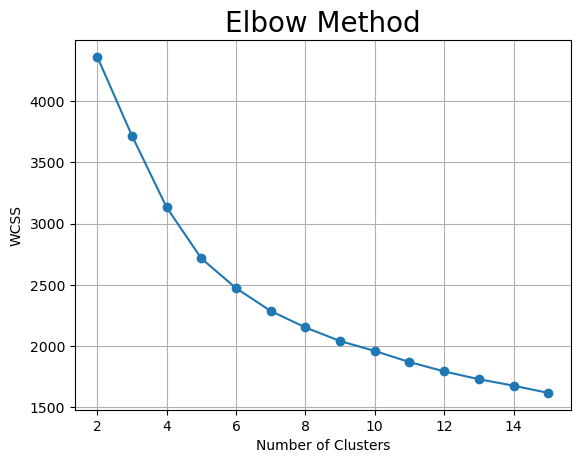

In [32]:
# Find the optimal number of clusters using Elbow Method
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df2_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- WCSS akan menurun seiring bertambahnya jumlah kluster. Hal ini terjadi karena semakin banyak kluster yang ada, semakin dekat setiap titik data dengan centroidnya.
- Titik Elbow adalah titik di mana laju penurunan WCSS mulai melambat. Titik ini menunjukkan jumlah kluster optimal.<br>

Berdasarkan grafik Elbow Method, jumlah cluster optimal kemungkinan berada di 4-7 setelahnya adalah titik di mana penurunan WCSS mulai melambat secara signifikan dan kurva mulai menjadi datar, menunjukkan bahwa penambahan kluster setelah titik ini tidak memberikan peningkatan signifikan dalam pengelompokan data.

## 7.2 Silhouette Score dan Silhouette Plot

In [33]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

Fungsi ini berguna untuk melihat nilai silhouette score dan memvisualisasikan dan mengevaluasi bagaimana pemilihan jumlah klaster (n_clusters) mempengaruhi hasil klastering menggunakan metrik silhouette.

For n_clusters = 2 The average silhouette_score is : 0.2781595792331973
For n_clusters = 3 The average silhouette_score is : 0.23484439791489026
For n_clusters = 4 The average silhouette_score is : 0.24806764457844496
For n_clusters = 5 The average silhouette_score is : 0.26302882283337425
For n_clusters = 6 The average silhouette_score is : 0.26986168832010826
For n_clusters = 7 The average silhouette_score is : 0.26529710829462294
For n_clusters = 8 The average silhouette_score is : 0.26533991034611604
For n_clusters = 9 The average silhouette_score is : 0.26716108673497097
For n_clusters = 10 The average silhouette_score is : 0.2668501355158889
For n_clusters = 11 The average silhouette_score is : 0.24070964437246503
For n_clusters = 12 The average silhouette_score is : 0.24179654120410848
For n_clusters = 13 The average silhouette_score is : 0.25801196170455915
For n_clusters = 14 The average silhouette_score is : 0.2505714508546742


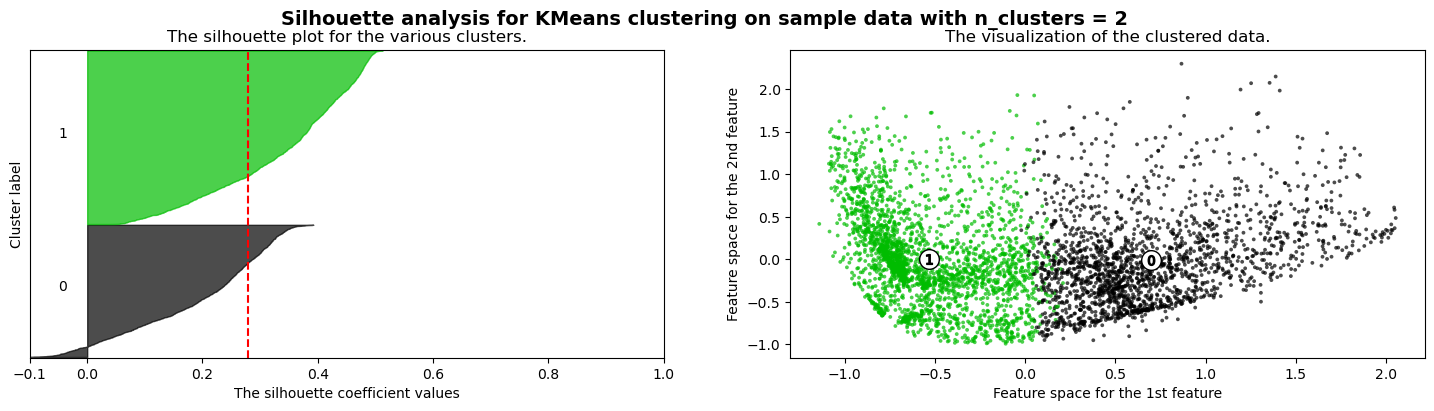

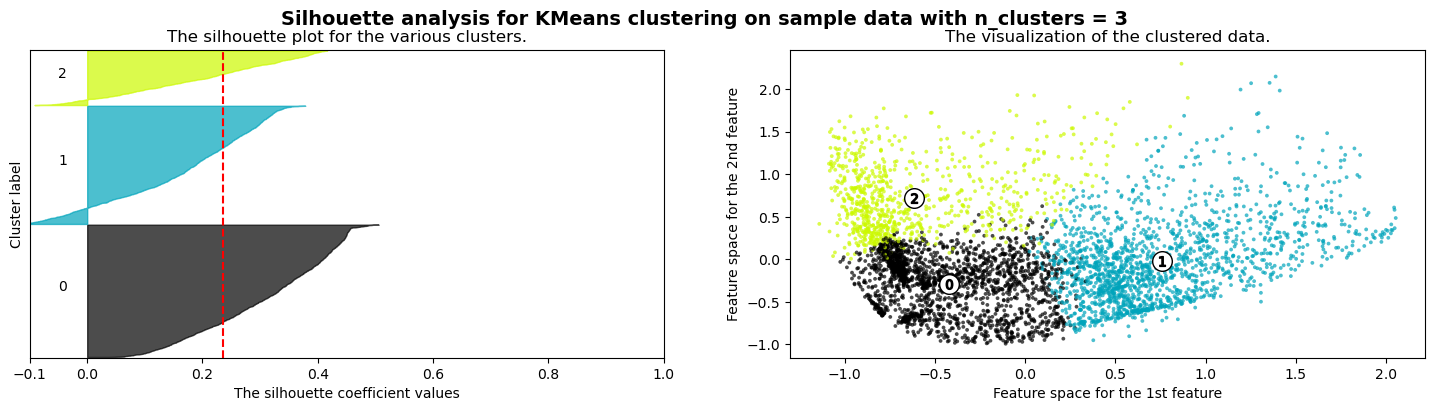

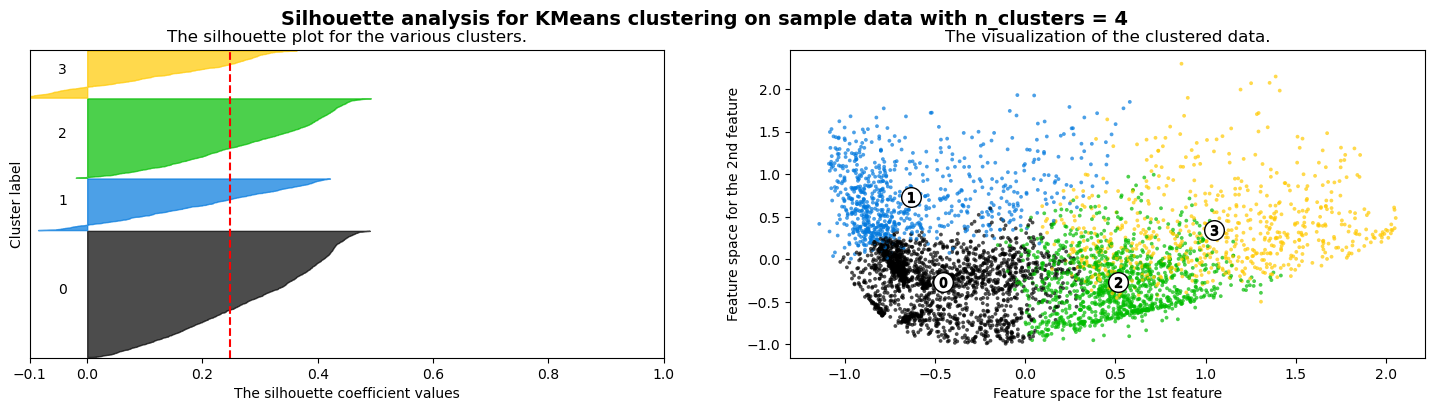

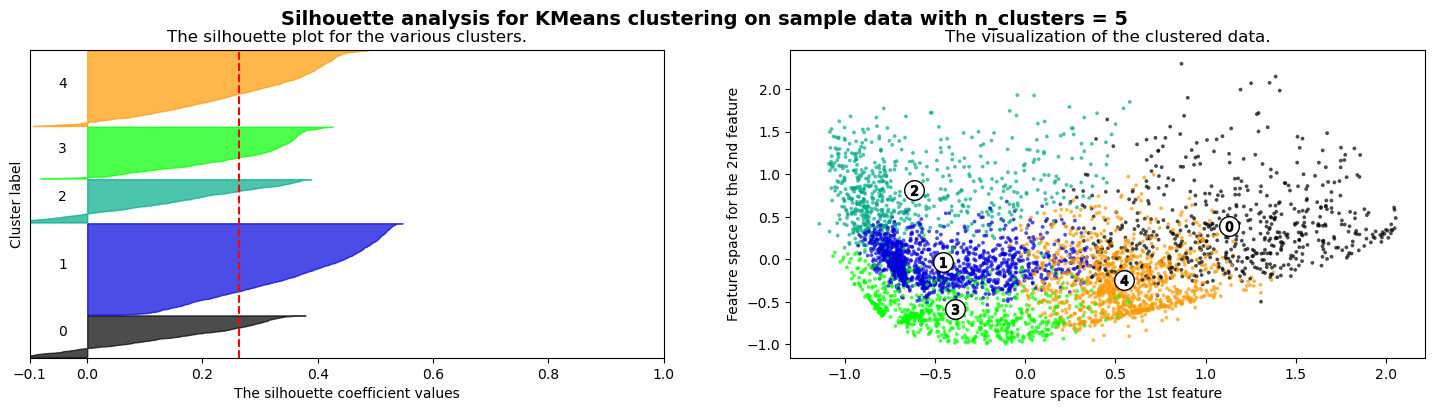

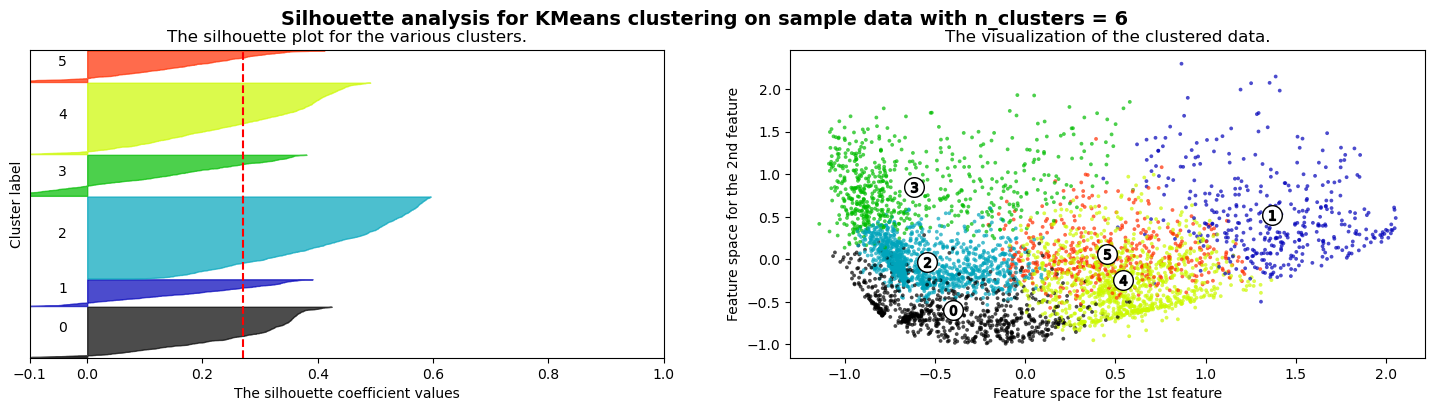

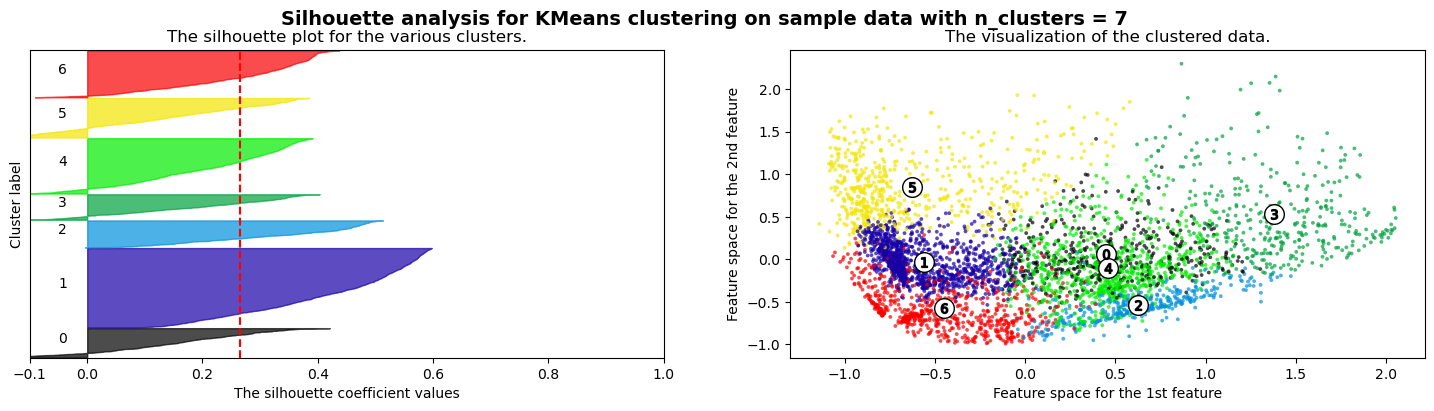

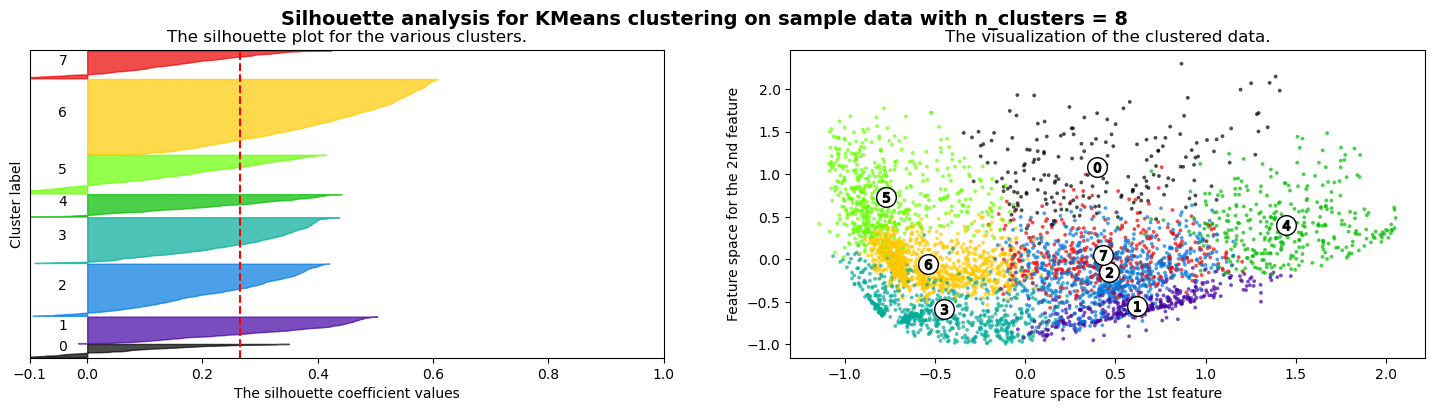

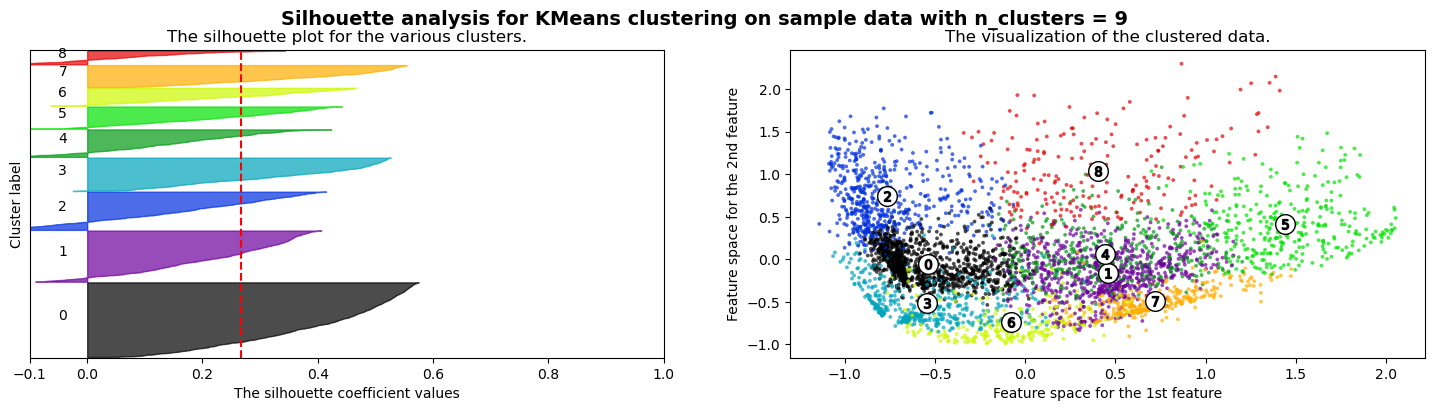

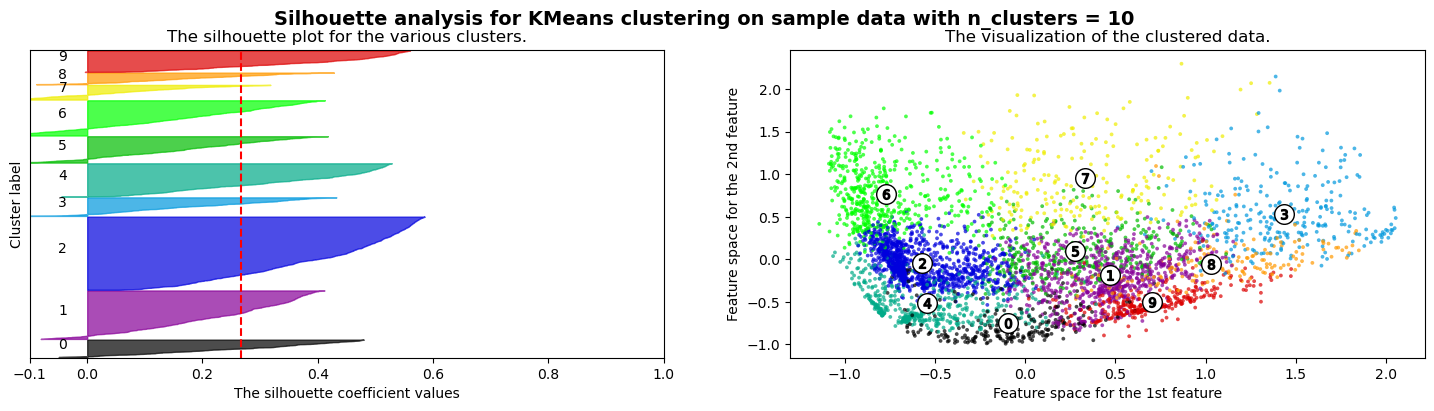

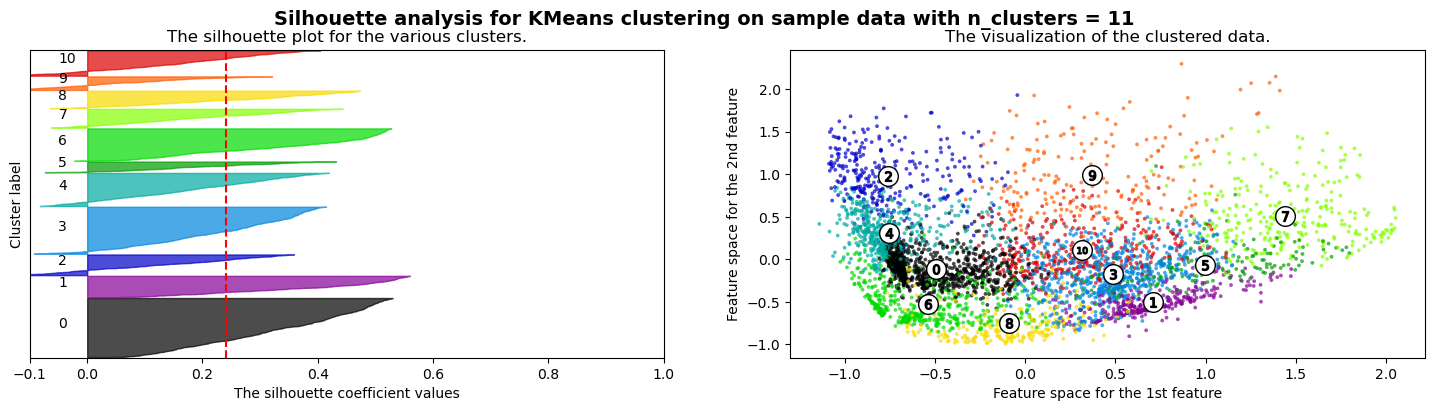

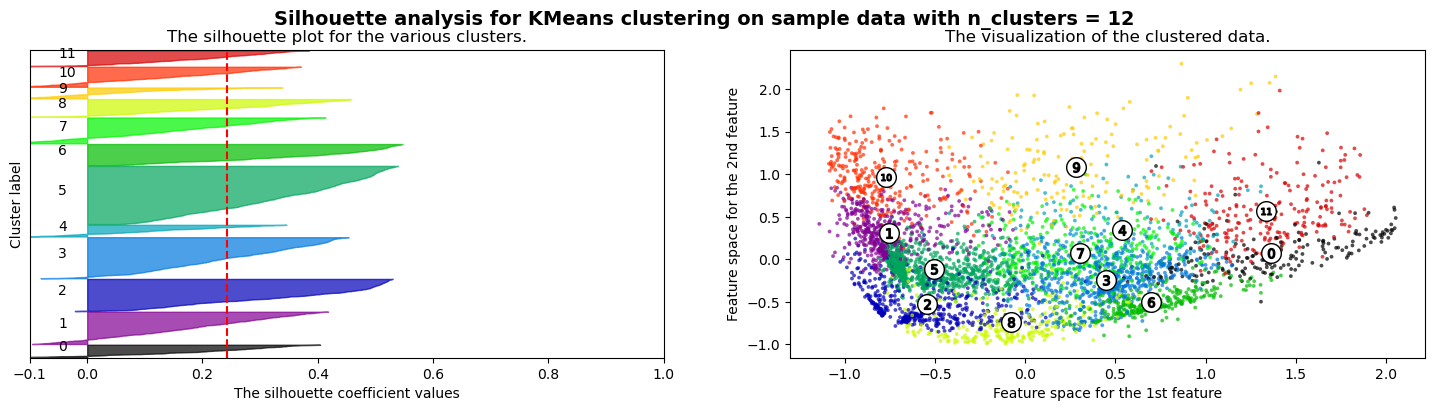

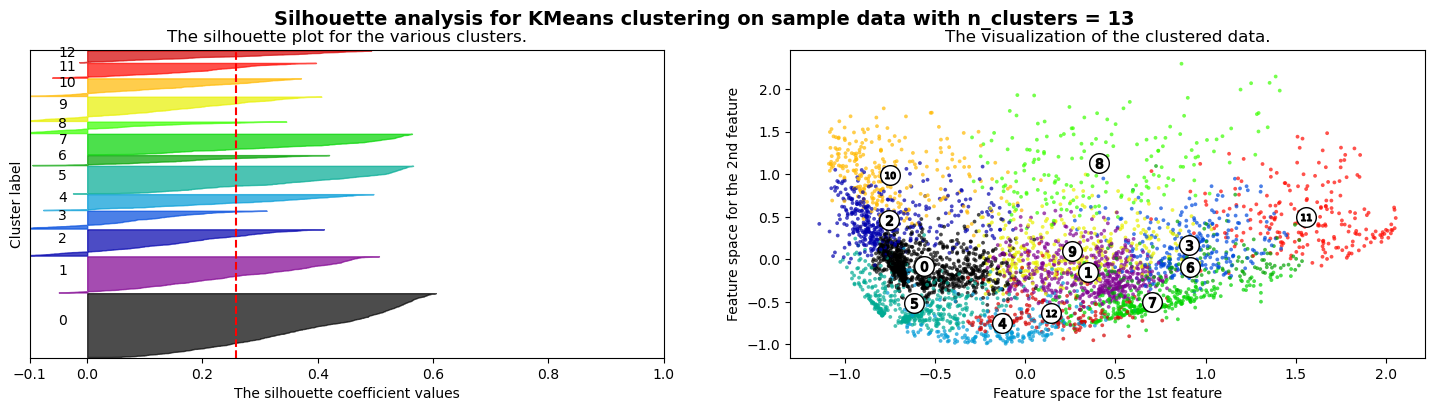

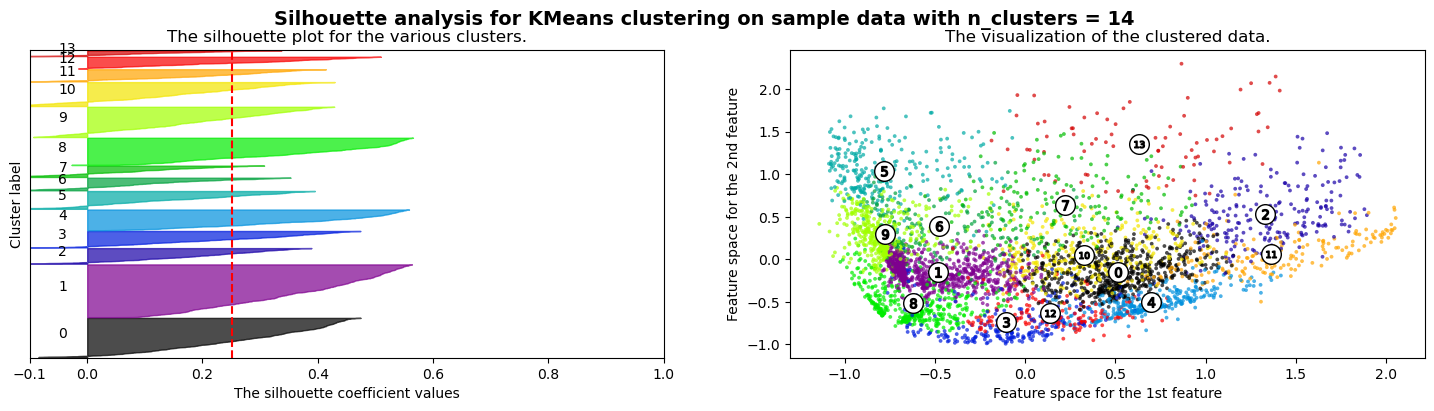

In [34]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df2_pca, random_state)

Dari silhouette saya memilih n_cluster = 4 dengan average silhouette_score is : 0.24806764457844496, saya memilih karena persebaran hampir sama tiap cluster dan juga jarak centroid ke centroid lainnya relatif lebih baik dibanding cluster lain

# 8. Model Training

## 8.1 Kmeans

In [35]:
# Train with optimal number of clusters
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df2_pca)
pred

array([0, 0, 0, ..., 1, 1, 1])

K-Means adalah salah satu algoritma clustering yang paling populer dan sederhana yang digunakan untuk membagi sekumpulan data menjadi beberapa kelompok (clusters) berdasarkan atribut atau fitur yang dimiliki oleh data tersebut<br>
- n_clusters = 4, saya memilih untuk membagi menjadi 4 cluster<br>
- init = 'k-means++', Inisialisasi centroid yang disebut k-means++<br>
- max_iter = 300, Jumlah iterasi maksimum<br>
- n_init = 10: Jumlah kali k-means akan dijalankan dengan kondisi awal centroid yang berbeda<br>
- random_state: Digunakan untuk mengontrol inisialisasi acak<br>

Hasil dari pred akan berisi label cluster untuk setiap sampel data dalam df2_pca

In [36]:
# Insert clustering result into original dataset
df_final['cluster'] = pred
df_final.head()

PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0                0.125                       0.000   
1                0.125                       0.125   
2                0.125                       0.125   
3                0.125                       0.125   
4                0.125                       0.125   

   PURCHASES_INSTALLMENTS_FREQUENCY   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
0                             0.125  0.002116            0.00000   0.045763   
1                             0.000  0.120409            0.71875   0.023568   
2                             0.000  0.000253            0.00000   0.018305   
3                             0.000  0.058886            1.00000   0.133856   
4                             0.000  0.134448            1.00000   0.331780   

   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0          0.000000                0.103251           0.0   
1          0.044372                0.000000           0.0   
2          0.034464                0.000000           0.0   
3          0.252016                0.000000           0.0   
4          0.624655                0.000000           0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0               0.0       0.030769      0.054264   
1                     0.0               0.0       0.015385      0.043928   
2                     0.0               0.0       0.015385      0.069767   
3                     0.0               0.0       0.015385      0.043928   
4                     0.0               0.0       0.015385      0.069767   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  cluster  
0  0.000000          0.116805               0.0        0  
1  0.033575          0.154744               0.0        0  
2  0.000000          0.116805               0.0        0  
3  0.040235          0.057177               0.0        0  
4  0.061918          0.085622               0.0        0

Memasukan data berisi pred kedalam df_final dengan nama kolom 'cluster'

<Axes: >

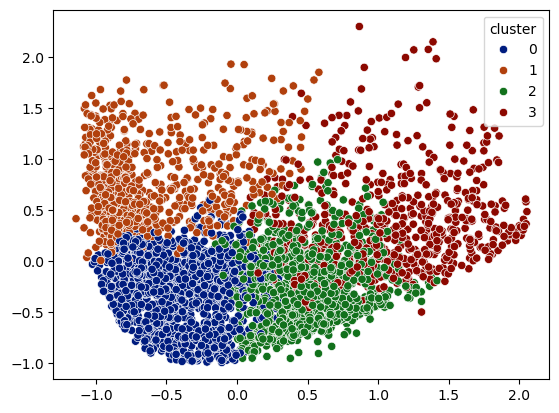

In [37]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=2)
pca_2d.fit(df2_pca)

dataclean = pca_2d.fit_transform(df2_pca)

sns.scatterplot(x=dataclean[:,0], y=dataclean[:,1], hue=df_final['cluster'], palette='dark')

Hasil data setelah memiliki cluster, pemisahan cluster menjadi kelompok yang berbeda berdasarkan fitur yang dimiliki, terdapat beberapa overlap pada cluster 3 yang ada didalam cluster 2

# 9. Model Evaluation

In [38]:
df_final.describe().T

count      mean       std  min       25%  \
PURCHASES_FREQUENCY               4475.0  0.490122  0.399874  0.0  0.083333   
ONEOFF_PURCHASES_FREQUENCY        4475.0  0.202614  0.298502  0.0  0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0  0.364989  0.397336  0.0  0.000000   
BALANCE                           4475.0  0.193425  0.239491  0.0  0.016913   
BALANCE_FREQUENCY                 4475.0  0.789998  0.362374  0.0  0.750000   
PURCHASES                         4475.0  0.191855  0.260469  0.0  0.009167   
ONEOFF_PURCHASES                  4475.0  0.183874  0.295909  0.0  0.000000   
INSTALLMENTS_PURCHASES            4475.0  0.179885  0.271251  0.0  0.000000   
CASH_ADVANCE                      4475.0  0.179345  0.296652  0.0  0.000000   
CASH_ADVANCE_FREQUENCY            4475.0  0.180655  0.260314  0.0  0.000000   
CASH_ADVANCE_TRX                  4475.0  0.172528  0.275474  0.0  0.000000   
PURCHASES_TRX                     4475.0  0.198903  0.254869  0.0  0.015385   
CREDIT_LIMIT                      4475.0  0.224105  0.187749  0.0  0.069767   
PAYMENTS                          4475.0  0.230092  0.253915  0.0  0.060844   
MINIMUM_PAYMENTS                  4475.0  0.233664  0.261695  0.0  0.064487   
PRC_FULL_PAYMENT                  4475.0  0.196357  0.343021  0.0  0.000000   
cluster                           4475.0  1.156425  1.127589  0.0  0.000000   

                                       50%       75%  max  
PURCHASES_FREQUENCY               0.500000  0.916667  1.0  
ONEOFF_PURCHASES_FREQUENCY        0.083333  0.333333  1.0  
PURCHASES_INSTALLMENTS_FREQUENCY  0.166667  0.750000  1.0  
BALANCE                           0.111645  0.262685  1.0  
BALANCE_FREQUENCY                 1.000000  1.000000  1.0  
PURCHASES                         0.082940  0.256876  1.0  
ONEOFF_PURCHASES                  0.012920  0.250000  1.0  
INSTALLMENTS_PURCHASES            0.046179  0.250000  1.0  
CASH_ADVANCE                      0.000000  0.250000  1.0  
CASH_ADVANCE_FREQUENCY            0.000000  0.250000  1.0  
CASH_ADVANCE_TRX                  0.000000  0.250000  1.0  
PURCHASES_TRX                     0.107692  0.261538  1.0  
CREDIT_LIMIT                      0.147287  0.302326  1.0  
PAYMENTS                          0.129584  0.295633  1.0  
MINIMUM_PAYMENTS                  0.116805  0.298365  1.0  
PRC_FULL_PAYMENT                  0.000000  0.250000  1.0  
cluster                           1.000000  2.000000  3.0

Deskripsi data berdasarkan antar feature

In [39]:
grouped_describe = df_final.groupby('cluster').describe()
display(grouped_describe)

PURCHASES_FREQUENCY                                            \
                      count      mean       std       min    25%  50%   
cluster                                                                 
0                    1855.0  0.200068  0.217870  0.000000  0.000  0.1   
1                     759.0  0.204285  0.285746  0.000000  0.000  0.0   
2                    1167.0  0.885544  0.147028  0.416667  0.800  1.0   
3                     694.0  0.913094  0.149935  0.250000  0.875  1.0   

                       ONEOFF_PURCHASES_FREQUENCY            ...  \
              75%  max                      count      mean  ...   
cluster                                                      ...   
0        0.333333  1.0                     1855.0  0.113874  ...   
1        0.333333  1.0                      759.0  0.097234  ...   
2        1.000000  1.0                     1167.0  0.095619  ...   
3        1.000000  1.0                      694.0  0.734976  ...   

        MINIMUM_PAYMENTS      PRC_FULL_PAYMENT                                \
                     75%  max            count      mean       std  min  25%   
cluster                                                                        
0               0.182368  1.0           1855.0  0.120387  0.274152  0.0  0.0   
1               0.671217  1.0            759.0  0.059153  0.141139  0.0  0.0   
2               0.198173  1.0           1167.0  0.332461  0.410788  0.0  0.0   
3               0.360092  1.0            694.0  0.320607  0.412462  0.0  0.0   

                                  
              50%       75%  max  
cluster                           
0        0.000000  0.000000  1.0  
1        0.000000  0.000000  1.0  
2        0.124999  0.749999  1.0  
3        0.000000  0.749999  1.0  

[4 rows x 128 columns]

Deskripsi data antar feature berdasarkan cluster

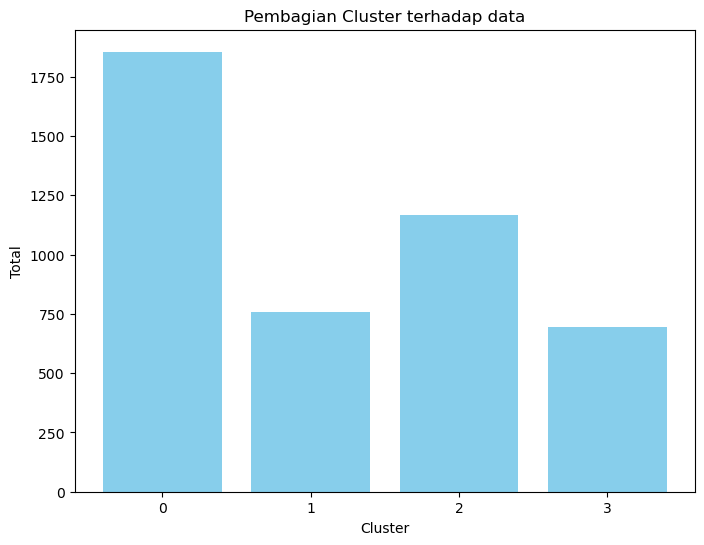

In [40]:
total = df_final['cluster'].value_counts().reset_index()
total.columns = ['cluster', 'jumlah']

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(total['cluster'], total['jumlah'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Total')
plt.title('Pembagian Cluster terhadap data')
plt.xticks(total['cluster'])  # Mengatur label sumbu x sesuai dengan nilai cluster
plt.show()



Pie chart berdasarkan pembagian cluster dari seluruh data

In [41]:
grouped_means = df_final.groupby('cluster').mean().T
display(grouped_means)

cluster                                  0         1         2         3
PURCHASES_FREQUENCY               0.200068  0.204285  0.885544  0.913094
ONEOFF_PURCHASES_FREQUENCY        0.113874  0.097234  0.095619  0.734976
PURCHASES_INSTALLMENTS_FREQUENCY  0.084332  0.115363  0.828029  0.609536
BALANCE                           0.114083  0.471793  0.099271  0.259386
BALANCE_FREQUENCY                 0.637651  0.921048  0.850958  0.951375
PURCHASES                         0.065759  0.069708  0.192552  0.661317
ONEOFF_PURCHASES                  0.095486  0.084572  0.065611  0.727591
INSTALLMENTS_PURCHASES            0.032726  0.052668  0.340705  0.441932
CASH_ADVANCE                      0.094279  0.671965  0.042159  0.098645
CASH_ADVANCE_FREQUENCY            0.122424  0.586951  0.055758  0.101968
CASH_ADVANCE_TRX                  0.094778  0.621212  0.048629  0.097983
PURCHASES_TRX                     0.053477  0.064052  0.279085  0.600266
CREDIT_LIMIT                      0.160557  0.326106  0.170158  0.373121
PAYMENTS                          0.132245  0.366352  0.154941  0.468974
MINIMUM_PAYMENTS                  0.159687  0.457335  0.185614  0.267575
PRC_FULL_PAYMENT                  0.120387  0.059153  0.332461  0.320607

Nilai mean dari tiap feature per cluster

<Axes: xlabel='cluster'>

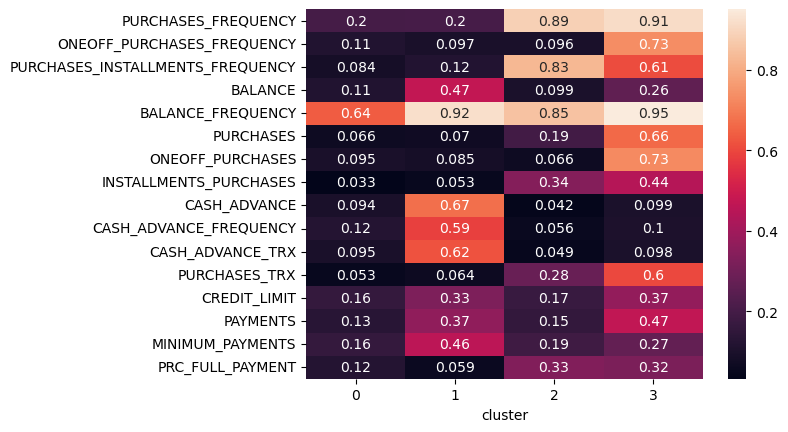

In [42]:
sns.heatmap(grouped_means.iloc[:,:5],annot=True)

| Cluster   | Purchases Frequency            | One-off Purchases Frequency     | Purchases Installments Frequency | Balance     | Balance Frequency |
|-----------|-------------------------------|--------------------------------|---------------------------------|-------------|-------------------|
| Cluster 0 | Low (0.20)                    | Low (0.11)                     | Very low (0.084)                | Very low (0.11) | Moderate (0.64)   |
| Cluster 1 | Moderate (0.20)               | Low (0.097)                    | Low (0.12)                      | Moderate (0.47) | High (0.92)       |
| Cluster 2 | Very high (0.89)              | Low (0.096)                    | Very high (0.83)                | Very low (0.099) | High (0.85)       |
| Cluster 3 | Very high (0.91)              | Very high (0.73)               | High (0.61)                     | Low (0.26)  | Very high (0.95)  |


**Cluster 0:**<br>
Cluster 0 cenderung memiliki keterlibatan yang sangat minim dengan kartu kredit mereka. Mereka jarang melakukan pembelian, baik sekali maupun secara cicilan. Saldo yang sangat rendah dan pengeluaran secara keseluruhan yang rendah menunjukkan bahwa mereka mungkin adalah pengguna dengan pendapatan rendah atau pengguna yang tidak terlalu bergantung pada kartu kredit mereka.

**Cluster 1:**<br>
Cluster 1 menunjukkan keterlibatan yang sedang dengan kartu kredit, dengan kecenderungan yang lebih tinggi untuk menggunakan cash advance. Frekuensi rendah dalam pembaruan saldo menunjukkan bahwa pengguna dalam cluster ini melakukan pembaruan saldo dengan sering, mungkin menunjukkan bahwa mereka aktif dalam mengelola akun mereka. Mereka memiliki batas pengeluaran yang moderat dan aktivitas pembayaran yang cukup, namun lebih memilih untuk melakukan cash advance daripada pembelian.

**Cluster 2:**<br>
cluster 2 menggunakan kartu kredit mereka secara sering untuk pembelian, terutama dengan cara dicicil, namun menjaga saldo yang sangat rendah. Mereka tidak mengandalkan cash advance dan memiliki jumlah transaksi yang tinggi untuk pembelian. Hal ini menunjukkan bahwa mereka mungkin memiliki disiplin keuangan yang baik, lebih memilih pembayaran dengan cara dicicil dan menjaga saldo mereka tetap rendah.

**Cluster 3:**<br>
Cluster 3 mencerminkan pengguna kartu kredit yang sangat aktif, dengan sering melakukan pembelian satu kali dan cicilan. Mereka menjaga saldo yang rendah namun frekuensi pembaruan saldo sangat tinggi, menunjukkan bahwa mereka aktif dalam mengelola akun mereka. Mereka kurang mengandalkan cash advance dan melakukan pembayaran yang tinggi, menunjukkan bahwa kemungkinan besar mereka stabil secara finansial dan menggunakan kartu kredit sebagai sarana utama untuk berbelanja.

**General Insights:**<br>
- Clusters 2 dan 3 menggambarkan pengguna aktif dengan high purchases frequency, meskipun Cluster 3 shows higher one-off purchases.
- Cluster 1 lebih mengandalkan cash advances daripada purchases, menunjukan potensi liquidity atau preferensi menggunakan uang tunai.
- Cluster 0 mewakili pengguna yang sangat tidak aktif dengan credit card, kemungkinan menunjukan pendapatan rendah atau kurang bergantung dengan credit card.

# 10. Model Saving

In [43]:
with open('pca.pkl', 'wb') as file1:
    pickle.dump(pca, file1)

with open('km.pkl', 'wb') as file2:
    pickle.dump(km, file2)

Kita menyimpan model pca dengan n_component 0,95<br>
kita menyimpan model km dengan n_cluster = 4, n_init = 10 dan random_state = 10

# 12. Pengambilan Kesimpulan

kesimpulan berdasarkan hasil analisis yang dilakukan:

**Pemilihan Jumlah Cluster:** Menggunakan metode Elbow, kami menentukan bahwa jumlah cluster optimal untuk dataset ini adalah 4. Hal ini dipilih berdasarkan penurunan inertia yang signifikan hingga titik 'elbow'.

**Interpretasi Cluster:**
- **Cluster 0:** Merupakan pengguna dengan keterlibatan rendah, memiliki frekuensi pembelian rendah dan saldo rendah. Mereka cenderung tidak aktif dalam menggunakan kartu kredit.
- **Cluster 1:** Terdiri dari pengguna dengan frekuensi pembelian sedang, saldo moderat, dan frekuensi pembayaran tinggi. Mereka memanfaatkan kartu kredit secara stabil dan efisien.
- **Cluster 2:** Pelanggan aktif dengan frekuensi pembelian tinggi terutama dalam angsuran, namun dengan saldo rendah. Mereka jarang menggunakan cash advance dan sering melakukan pembayaran penuh.
- **Cluster 3:** Pengguna kartu kredit paling aktif dengan frekuensi pembelian tinggi, terutama pembelian satu kali (one-off), dan saldo moderat. Mereka cenderung melakukan pembayaran dalam jumlah besar.

**Rekomendasi**<br>
Segmentasi ini dapat membantu bank untuk menyesuaikan strategi pemasaran dan layanan berdasarkan preferensi dan perilaku pengguna. **Cluster 3** dapat menjadi target untuk produk-produk premium atau penawaran khusus, sementara **Cluster 0** mungkin memerlukan pendekatan yang berbeda untuk meningkatkan keterlibatan.

**Model:**
Model clustering ini dapat memberikan pandangan yang lebih dalam mengenai profil dan perilaku pengguna kartu kredit. Dengan memahami perbedaan antar cluster, bank dapat mengoptimalkan layanan dan pengalaman pelanggan untuk meningkatkan retensi dan kepuasan pelanggan. Dengan demikian, hasil dari analisis clustering ini diharapkan dapat memberikan panduan berharga bagi keputusan yang lebih baik dan berfokus pada kebutuhan pelanggan secara lebih efektif.

**Conceptual Problems**
1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

**Jawab**
1. Inertia pada Algoritma K-Means mengacu pada ukuran yang digunakan untuk mengevaluasi seberapa baik sebuah model K-Means sesuai dengan data yang ada
   - Inertia mengukur seberapa baik cluster-cluster yang dihasilkan oleh K-Means sesuai dengan data.
   - Dihitung sebagai jumlah jarak kuadrat antara setiap titik data dengan pusat cluster terdekat.
   - Tujuan dari K-Means adalah untuk meminimalkan inertia.

2. Metode Elbow adalah salah satu metode yang digunakan untuk menentukan jumlah optimal cluster \( k \) dalam algoritma K-Means
   - **Alasan Penggunaan:**
     - Mencari Jumlah Cluster Optimal: Metode Elbow membantu dalam menentukan jumlah cluster yang optimal untuk memaksimalkan pemisahan antara cluster-cluster tanpa overfitting atau underfitting.
   - **Cara Penggunaan:**
     - Lakukan clustering dengan KMeans, Hitung nilai inertia, nilai inertia terhadap jumlah cluster, identifikasi elbow dengan grafik dimana sudah tidak memberikan nilai inertia yang signifikan, lalu pilih nilai \( k \) disekitar titik elbow sebagai jumlah cluster optimal.
   - **Kelebihan Elbow:**
     - Mudah dipahami, dan diimplementasikan.
   - **Kekurangan Elbow:**
     - Identifikasi titik elbow bersifat subjektif tergantung pada interpretasi grafik inertia.
